### 1. WEB SCRAPPING

#### IMPORTING IMPORTANT LIBRARIES

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### CODE FOR WEBSCRAPPING

In [4]:
# Base website URL
base_url = "https://books.toscrape.com/"

# Create a CSV file and write headers
file = open("final_books_data.csv", "w", newline="", encoding="utf-8")
writer = csv.writer(file)
writer.writerow(["Title", "Rating", "Genre", "Availability", "Price", "Product_Link", "UPC", "Page_Number"])

page_number = 1
next_page = "catalogue/page-1.html"  # starting page

# Loop through all pages until no "next" button
while next_page:
    print(f"Scraping page {page_number}...")

    # Get the full URL of the page
    url = urljoin(base_url, next_page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all book containers
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        # Title
        title = book.h3.a["title"]

        # Price
        price = book.find("p", class_="price_color").text.strip()

        # Availability
        availability = book.find("p", class_="instock availability").text.strip()

        # Rating (in class name)
        rating = book.p["class"][1]  # e.g., 'Three', 'Five'

        # Product link
        product_link = urljoin(url, book.h3.a["href"])

        # Go to book detail page to get UPC and Genre
        detail_page = requests.get(product_link)
        detail_soup = BeautifulSoup(detail_page.text, "html.parser")

        # UPC code from product info table
        upc = detail_soup.find("th", string="UPC").find_next("td").text.strip()

        # Genre (breadcrumb navigation)
        genre = detail_soup.select("ul.breadcrumb li a")[2].text.strip()

        # Write one row to CSV
        writer.writerow([title, rating, genre, availability, price, product_link, upc, page_number])
        
    # Find the "next" button if it exists
    next_button = soup.select_one("li.next a")
    if next_button:
        next_page = "catalogue/" + next_button["href"]
        page_number += 1
    else:
        next_page = None  # stop the loop

file.close()
print("✅ Scraping completed! Data saved to 'final_books_data.csv'")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
✅ Scrapin

#### Observation:

Successfully scraped all 1000 books (20 × 50 pages) with 8 columns of structured data.

Each record includes title, price, availability, rating, genre, UPC, product link, and page number.

The scraper correctly navigates between main pages and detail pages.

Data was stored safely in CSV format, ready for data cleaning + EDA.

No manual intervention required — process is fully automated and scalable.

### 2.EDA

#### LOADING THE DATASET

In [5]:
df=pd.read_csv(r"C:\Users\rajun\Innomatics\BATCH406\final_books_data.csv")
df

Title Rating  \
0                                 A Light in the Attic  Three   
1                                   Tipping the Velvet    One   
2                                           Soumission    One   
3                                        Sharp Objects   Four   
4                Sapiens: A Brief History of Humankind   Five   
..                                                 ...    ...   
995  Alice in Wonderland (Alice's Adventures in Won...    One   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)   Four   
997  A Spy's Devotion (The Regency Spies of London #1)   Five   
998                1st to Die (Women's Murder Club #1)    One   
999                 1,000 Places to See Before You Die   Five   

                  Genre Availability    Price  \
0                Poetry     In stock  Â£51.77   
1    Historical Fiction     In stock  Â£53.74   
2               Fiction     In stock  Â£50.10   
3               Mystery     In stock  Â£47.82   
4               History     In stock  Â£54.23   
..                  ...          ...      ...   
995            Classics     In stock  Â£55.53   
996      Sequential Art     In stock  Â£57.06   
997  Historical Fiction     In stock  Â£16.97   
998             Mystery     In stock  Â£53.98   
999              Travel     In stock  Â£26.08   

                                          Product_Link               UPC  \
0    https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
1    https://books.toscrape.com/catalogue/tipping-t...  90fa61229261140a   
2    https://books.toscrape.com/catalogue/soumissio...  6957f44c3847a760   
3    https://books.toscrape.com/catalogue/sharp-obj...  e00eb4fd7b871a48   
4    https://books.toscrape.com/catalogue/sapiens-a...  4165285e1663650f   
..                                                 ...               ...   
995  https://books.toscrape.com/catalogue/alice-in-...  cd2a2a70dd5d176d   
996  https://books.toscrape.com/catalogue/ajin-demi...  bfd5e1701c862ac3   
997  https://books.toscrape.com/catalogue/a-spys-de...  19fec36a1dfb4c16   
998  https://books.toscrape.com/catalogue/1st-to-di...  f684a82adc49f011   
999  https://books.toscrape.com/catalogue/1000-plac...  228ba5e7577e1d49   

     Page_Number  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
995           50  
996           50  
997           50  
998           50  
999           50  

[1000 rows x 8 columns]

#### Checking Column Names

In [8]:
df.columns.tolist()

['Title',
 'Rating',
 'Genre',
 'Availability',
 'Price',
 'Product_Link',
 'UPC',
 'Page_Number']

#### CHECKING THE DATATYPES OF THE COLUMNS

In [9]:
df.dtypes

Title           object
Rating          object
Genre           object
Availability    object
Price           object
Product_Link    object
UPC             object
Page_Number      int64
dtype: object

In [6]:
df.isnull().sum()

Title           0
Rating          0
Genre           0
Availability    0
Price           0
Product_Link    0
UPC             0
Page_Number     0
dtype: int64

In [10]:
df = df.rename(columns={'Product_Link': 'Product Link'})

In [11]:
df = df.rename(columns={'Page_Number': 'Page Number'})

In [12]:
df

Title Rating  \
0                                 A Light in the Attic  Three   
1                                   Tipping the Velvet    One   
2                                           Soumission    One   
3                                        Sharp Objects   Four   
4                Sapiens: A Brief History of Humankind   Five   
..                                                 ...    ...   
995  Alice in Wonderland (Alice's Adventures in Won...    One   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)   Four   
997  A Spy's Devotion (The Regency Spies of London #1)   Five   
998                1st to Die (Women's Murder Club #1)    One   
999                 1,000 Places to See Before You Die   Five   

                  Genre Availability    Price  \
0                Poetry     In stock  Â£51.77   
1    Historical Fiction     In stock  Â£53.74   
2               Fiction     In stock  Â£50.10   
3               Mystery     In stock  Â£47.82   
4               History     In stock  Â£54.23   
..                  ...          ...      ...   
995            Classics     In stock  Â£55.53   
996      Sequential Art     In stock  Â£57.06   
997  Historical Fiction     In stock  Â£16.97   
998             Mystery     In stock  Â£53.98   
999              Travel     In stock  Â£26.08   

                                          Product Link               UPC  \
0    https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
1    https://books.toscrape.com/catalogue/tipping-t...  90fa61229261140a   
2    https://books.toscrape.com/catalogue/soumissio...  6957f44c3847a760   
3    https://books.toscrape.com/catalogue/sharp-obj...  e00eb4fd7b871a48   
4    https://books.toscrape.com/catalogue/sapiens-a...  4165285e1663650f   
..                                                 ...               ...   
995  https://books.toscrape.com/catalogue/alice-in-...  cd2a2a70dd5d176d   
996  https://books.toscrape.com/catalogue/ajin-demi...  bfd5e1701c862ac3   
997  https://books.toscrape.com/catalogue/a-spys-de...  19fec36a1dfb4c16   
998  https://books.toscrape.com/catalogue/1st-to-di...  f684a82adc49f011   
999  https://books.toscrape.com/catalogue/1000-plac...  228ba5e7577e1d49   

     Page Number  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
995           50  
996           50  
997           50  
998           50  
999           50  

[1000 rows x 8 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1000 non-null   object
 1   Rating        1000 non-null   object
 2   Genre         1000 non-null   object
 3   Availability  1000 non-null   object
 4   Price         1000 non-null   object
 5   Product Link  1000 non-null   object
 6   UPC           1000 non-null   object
 7   Page Number   1000 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [16]:
df.describe(include='all')

Title Rating    Genre Availability    Price  \
count                     1000   1000     1000         1000     1000   
unique                     999      5       50            1      903   
top     The Star-Touched Queen    One  Default     In stock  Â£44.18   
freq                         2    226      152         1000        3   
mean                       NaN    NaN      NaN          NaN      NaN   
std                        NaN    NaN      NaN          NaN      NaN   
min                        NaN    NaN      NaN          NaN      NaN   
25%                        NaN    NaN      NaN          NaN      NaN   
50%                        NaN    NaN      NaN          NaN      NaN   
75%                        NaN    NaN      NaN          NaN      NaN   
max                        NaN    NaN      NaN          NaN      NaN   

                                             Product Link               UPC  \
count                                                1000              1000   
unique                                               1000              1000   
top     https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
freq                                                    1                 1   
mean                                                  NaN               NaN   
std                                                   NaN               NaN   
min                                                   NaN               NaN   
25%                                                   NaN               NaN   
50%                                                   NaN               NaN   
75%                                                   NaN               NaN   
max                                                   NaN               NaN   

        Page Number  
count   1000.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean      25.500000  
std       14.438091  
min        1.000000  
25%       13.000000  
50%       25.500000  
75%       38.000000  
max       50.000000

In [17]:
df['Rating'].unique()

array(['Three', 'One', 'Four', 'Five', 'Two'], dtype=object)

In [18]:
rating_map={'Three':3, 'One':1, 'Four':4, 'Five':5, 'Two':2}
df['Rating']=df['Rating'].map(rating_map)

In [19]:
df

Title  Rating  \
0                                 A Light in the Attic       3   
1                                   Tipping the Velvet       1   
2                                           Soumission       1   
3                                        Sharp Objects       4   
4                Sapiens: A Brief History of Humankind       5   
..                                                 ...     ...   
995  Alice in Wonderland (Alice's Adventures in Won...       1   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)       4   
997  A Spy's Devotion (The Regency Spies of London #1)       5   
998                1st to Die (Women's Murder Club #1)       1   
999                 1,000 Places to See Before You Die       5   

                  Genre Availability    Price  \
0                Poetry     In stock  Â£51.77   
1    Historical Fiction     In stock  Â£53.74   
2               Fiction     In stock  Â£50.10   
3               Mystery     In stock  Â£47.82   
4               History     In stock  Â£54.23   
..                  ...          ...      ...   
995            Classics     In stock  Â£55.53   
996      Sequential Art     In stock  Â£57.06   
997  Historical Fiction     In stock  Â£16.97   
998             Mystery     In stock  Â£53.98   
999              Travel     In stock  Â£26.08   

                                          Product Link               UPC  \
0    https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
1    https://books.toscrape.com/catalogue/tipping-t...  90fa61229261140a   
2    https://books.toscrape.com/catalogue/soumissio...  6957f44c3847a760   
3    https://books.toscrape.com/catalogue/sharp-obj...  e00eb4fd7b871a48   
4    https://books.toscrape.com/catalogue/sapiens-a...  4165285e1663650f   
..                                                 ...               ...   
995  https://books.toscrape.com/catalogue/alice-in-...  cd2a2a70dd5d176d   
996  https://books.toscrape.com/catalogue/ajin-demi...  bfd5e1701c862ac3   
997  https://books.toscrape.com/catalogue/a-spys-de...  19fec36a1dfb4c16   
998  https://books.toscrape.com/catalogue/1st-to-di...  f684a82adc49f011   
999  https://books.toscrape.com/catalogue/1000-plac...  228ba5e7577e1d49   

     Page Number  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
995           50  
996           50  
997           50  
998           50  
999           50  

[1000 rows x 8 columns]

In [20]:
df['Price']=df['Price'].str.replace("£", "", regex=False).replace(r"[^\d.]", "",regex=True).astype(float)

In [21]:
df

Title  Rating  \
0                                 A Light in the Attic       3   
1                                   Tipping the Velvet       1   
2                                           Soumission       1   
3                                        Sharp Objects       4   
4                Sapiens: A Brief History of Humankind       5   
..                                                 ...     ...   
995  Alice in Wonderland (Alice's Adventures in Won...       1   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)       4   
997  A Spy's Devotion (The Regency Spies of London #1)       5   
998                1st to Die (Women's Murder Club #1)       1   
999                 1,000 Places to See Before You Die       5   

                  Genre Availability  Price  \
0                Poetry     In stock  51.77   
1    Historical Fiction     In stock  53.74   
2               Fiction     In stock  50.10   
3               Mystery     In stock  47.82   
4               History     In stock  54.23   
..                  ...          ...    ...   
995            Classics     In stock  55.53   
996      Sequential Art     In stock  57.06   
997  Historical Fiction     In stock  16.97   
998             Mystery     In stock  53.98   
999              Travel     In stock  26.08   

                                          Product Link               UPC  \
0    https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
1    https://books.toscrape.com/catalogue/tipping-t...  90fa61229261140a   
2    https://books.toscrape.com/catalogue/soumissio...  6957f44c3847a760   
3    https://books.toscrape.com/catalogue/sharp-obj...  e00eb4fd7b871a48   
4    https://books.toscrape.com/catalogue/sapiens-a...  4165285e1663650f   
..                                                 ...               ...   
995  https://books.toscrape.com/catalogue/alice-in-...  cd2a2a70dd5d176d   
996  https://books.toscrape.com/catalogue/ajin-demi...  bfd5e1701c862ac3   
997  https://books.toscrape.com/catalogue/a-spys-de...  19fec36a1dfb4c16   
998  https://books.toscrape.com/catalogue/1st-to-di...  f684a82adc49f011   
999  https://books.toscrape.com/catalogue/1000-plac...  228ba5e7577e1d49   

     Page Number  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
995           50  
996           50  
997           50  
998           50  
999           50  

[1000 rows x 8 columns]

In [22]:
df['Genre']=df['Genre'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         1000 non-null   object  
 1   Rating        1000 non-null   int64   
 2   Genre         1000 non-null   category
 3   Availability  1000 non-null   object  
 4   Price         1000 non-null   float64 
 5   Product Link  1000 non-null   object  
 6   UPC           1000 non-null   object  
 7   Page Number   1000 non-null   int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 58.2+ KB


In [24]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [25]:
outliers = {}

In [26]:
for col in num_cols:
    if df[col].isnull().all():
        continue  
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = df[(df[col] < lower) | (df[col] > upper)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values.tolist()

In [27]:
if outliers:
    for col, vals in outliers.items():
        print(f"\nOutliers in column '{col}':\n{vals}")
else:
      print("No outliers found in the numerical columns.")

No outliers found in the numerical columns.


In [28]:
df.isnull().sum()

Title           0
Rating          0
Genre           0
Availability    0
Price           0
Product Link    0
UPC             0
Page Number     0
dtype: int64

In [29]:
df

Title  Rating  \
0                                 A Light in the Attic       3   
1                                   Tipping the Velvet       1   
2                                           Soumission       1   
3                                        Sharp Objects       4   
4                Sapiens: A Brief History of Humankind       5   
..                                                 ...     ...   
995  Alice in Wonderland (Alice's Adventures in Won...       1   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)       4   
997  A Spy's Devotion (The Regency Spies of London #1)       5   
998                1st to Die (Women's Murder Club #1)       1   
999                 1,000 Places to See Before You Die       5   

                  Genre Availability  Price  \
0                Poetry     In stock  51.77   
1    Historical Fiction     In stock  53.74   
2               Fiction     In stock  50.10   
3               Mystery     In stock  47.82   
4               History     In stock  54.23   
..                  ...          ...    ...   
995            Classics     In stock  55.53   
996      Sequential Art     In stock  57.06   
997  Historical Fiction     In stock  16.97   
998             Mystery     In stock  53.98   
999              Travel     In stock  26.08   

                                          Product Link               UPC  \
0    https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
1    https://books.toscrape.com/catalogue/tipping-t...  90fa61229261140a   
2    https://books.toscrape.com/catalogue/soumissio...  6957f44c3847a760   
3    https://books.toscrape.com/catalogue/sharp-obj...  e00eb4fd7b871a48   
4    https://books.toscrape.com/catalogue/sapiens-a...  4165285e1663650f   
..                                                 ...               ...   
995  https://books.toscrape.com/catalogue/alice-in-...  cd2a2a70dd5d176d   
996  https://books.toscrape.com/catalogue/ajin-demi...  bfd5e1701c862ac3   
997  https://books.toscrape.com/catalogue/a-spys-de...  19fec36a1dfb4c16   
998  https://books.toscrape.com/catalogue/1st-to-di...  f684a82adc49f011   
999  https://books.toscrape.com/catalogue/1000-plac...  228ba5e7577e1d49   

     Page Number  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
995           50  
996           50  
997           50  
998           50  
999           50  

[1000 rows x 8 columns]

In [30]:
df1=pd.DataFrame(df)
df1

Title  Rating  \
0                                 A Light in the Attic       3   
1                                   Tipping the Velvet       1   
2                                           Soumission       1   
3                                        Sharp Objects       4   
4                Sapiens: A Brief History of Humankind       5   
..                                                 ...     ...   
995  Alice in Wonderland (Alice's Adventures in Won...       1   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)       4   
997  A Spy's Devotion (The Regency Spies of London #1)       5   
998                1st to Die (Women's Murder Club #1)       1   
999                 1,000 Places to See Before You Die       5   

                  Genre Availability  Price  \
0                Poetry     In stock  51.77   
1    Historical Fiction     In stock  53.74   
2               Fiction     In stock  50.10   
3               Mystery     In stock  47.82   
4               History     In stock  54.23   
..                  ...          ...    ...   
995            Classics     In stock  55.53   
996      Sequential Art     In stock  57.06   
997  Historical Fiction     In stock  16.97   
998             Mystery     In stock  53.98   
999              Travel     In stock  26.08   

                                          Product Link               UPC  \
0    https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
1    https://books.toscrape.com/catalogue/tipping-t...  90fa61229261140a   
2    https://books.toscrape.com/catalogue/soumissio...  6957f44c3847a760   
3    https://books.toscrape.com/catalogue/sharp-obj...  e00eb4fd7b871a48   
4    https://books.toscrape.com/catalogue/sapiens-a...  4165285e1663650f   
..                                                 ...               ...   
995  https://books.toscrape.com/catalogue/alice-in-...  cd2a2a70dd5d176d   
996  https://books.toscrape.com/catalogue/ajin-demi...  bfd5e1701c862ac3   
997  https://books.toscrape.com/catalogue/a-spys-de...  19fec36a1dfb4c16   
998  https://books.toscrape.com/catalogue/1st-to-di...  f684a82adc49f011   
999  https://books.toscrape.com/catalogue/1000-plac...  228ba5e7577e1d49   

     Page Number  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
995           50  
996           50  
997           50  
998           50  
999           50  

[1000 rows x 8 columns]

In [31]:
df1=pd.DataFrame(df)
df1

Title  Rating  \
0                                 A Light in the Attic       3   
1                                   Tipping the Velvet       1   
2                                           Soumission       1   
3                                        Sharp Objects       4   
4                Sapiens: A Brief History of Humankind       5   
..                                                 ...     ...   
995  Alice in Wonderland (Alice's Adventures in Won...       1   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)       4   
997  A Spy's Devotion (The Regency Spies of London #1)       5   
998                1st to Die (Women's Murder Club #1)       1   
999                 1,000 Places to See Before You Die       5   

                  Genre Availability  Price  \
0                Poetry     In stock  51.77   
1    Historical Fiction     In stock  53.74   
2               Fiction     In stock  50.10   
3               Mystery     In stock  47.82   
4               History     In stock  54.23   
..                  ...          ...    ...   
995            Classics     In stock  55.53   
996      Sequential Art     In stock  57.06   
997  Historical Fiction     In stock  16.97   
998             Mystery     In stock  53.98   
999              Travel     In stock  26.08   

                                          Product Link               UPC  \
0    https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
1    https://books.toscrape.com/catalogue/tipping-t...  90fa61229261140a   
2    https://books.toscrape.com/catalogue/soumissio...  6957f44c3847a760   
3    https://books.toscrape.com/catalogue/sharp-obj...  e00eb4fd7b871a48   
4    https://books.toscrape.com/catalogue/sapiens-a...  4165285e1663650f   
..                                                 ...               ...   
995  https://books.toscrape.com/catalogue/alice-in-...  cd2a2a70dd5d176d   
996  https://books.toscrape.com/catalogue/ajin-demi...  bfd5e1701c862ac3   
997  https://books.toscrape.com/catalogue/a-spys-de...  19fec36a1dfb4c16   
998  https://books.toscrape.com/catalogue/1st-to-di...  f684a82adc49f011   
999  https://books.toscrape.com/catalogue/1000-plac...  228ba5e7577e1d49   

     Page Number  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
995           50  
996           50  
997           50  
998           50  
999           50  

[1000 rows x 8 columns]

In [32]:
df1.to_csv("final_clean_books_data.csv", index=False)

## VISUALIZATION

### univariate

In [127]:
import warnings
warnings.filterwarnings('ignore')

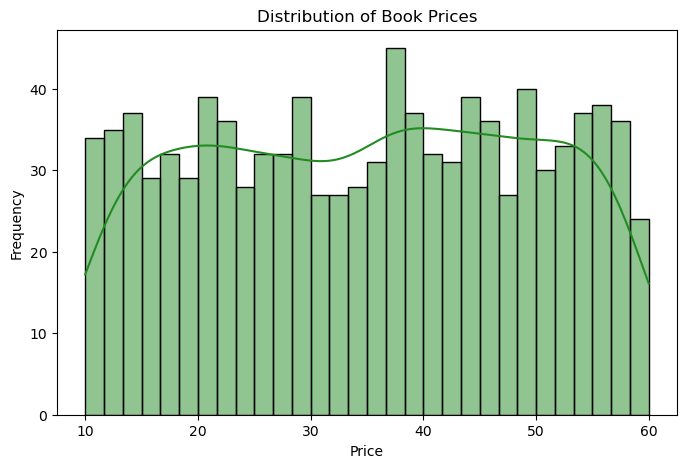

In [55]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True,color='forestgreen')
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#### Observation:

The distribution is right-skewed, meaning that most books are concentrated in the lower price range.

The majority of books fall between £20 and £40, showing that this is the most common price bracket on the website.

A smaller number of books are priced above £50, indicating that high-priced books are rare.

The smooth KDE curve confirms a single peak (unimodal distribution), suggesting a consistent pricing pattern with few outliers.

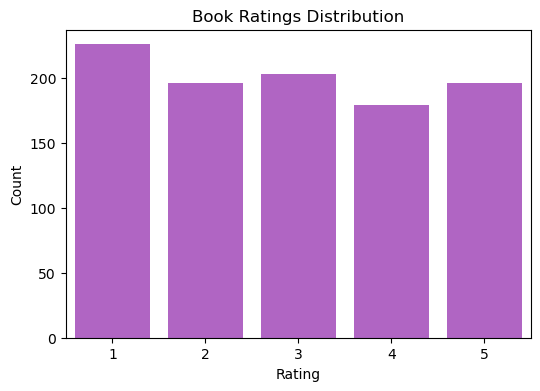

In [47]:
# Ratings distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df1,color=)
plt.title("Book Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Observation:

The 1-star rating has the highest count, meaning a large number of books are rated the lowest.

The pattern suggests that the website includes many average or poorly rated books, possibly for variety or demonstration.

In [59]:
df1

Title  Rating  \
0                                 A Light in the Attic       3   
1                                   Tipping the Velvet       1   
2                                           Soumission       1   
3                                        Sharp Objects       4   
4                Sapiens: A Brief History of Humankind       5   
..                                                 ...     ...   
995  Alice in Wonderland (Alice's Adventures in Won...       1   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)       4   
997  A Spy's Devotion (The Regency Spies of London #1)       5   
998                1st to Die (Women's Murder Club #1)       1   
999                 1,000 Places to See Before You Die       5   

                  Genre Availability  Price  \
0                Poetry     In stock  51.77   
1    Historical Fiction     In stock  53.74   
2               Fiction     In stock  50.10   
3               Mystery     In stock  47.82   
4               History     In stock  54.23   
..                  ...          ...    ...   
995            Classics     In stock  55.53   
996      Sequential Art     In stock  57.06   
997  Historical Fiction     In stock  16.97   
998             Mystery     In stock  53.98   
999              Travel     In stock  26.08   

                                          Product Link               UPC  \
0    https://books.toscrape.com/catalogue/a-light-i...  a897fe39b1053632   
1    https://books.toscrape.com/catalogue/tipping-t...  90fa61229261140a   
2    https://books.toscrape.com/catalogue/soumissio...  6957f44c3847a760   
3    https://books.toscrape.com/catalogue/sharp-obj...  e00eb4fd7b871a48   
4    https://books.toscrape.com/catalogue/sapiens-a...  4165285e1663650f   
..                                                 ...               ...   
995  https://books.toscrape.com/catalogue/alice-in-...  cd2a2a70dd5d176d   
996  https://books.toscrape.com/catalogue/ajin-demi...  bfd5e1701c862ac3   
997  https://books.toscrape.com/catalogue/a-spys-de...  19fec36a1dfb4c16   
998  https://books.toscrape.com/catalogue/1st-to-di...  f684a82adc49f011   
999  https://books.toscrape.com/catalogue/1000-plac...  228ba5e7577e1d49   

     Page Number  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
995           50  
996           50  
997           50  
998           50  
999           50  

[1000 rows x 8 columns]

In [64]:
df['Genre'].values

['Poetry', 'Historical Fiction', 'Fiction', 'Mystery', 'History', ..., 'Classics', 'Sequential Art', 'Historical Fiction', 'Mystery', 'Travel']
Length: 1000
Categories (50, object): ['Academic', 'Add a comment', 'Adult Fiction', 'Art', ..., 'Thriller', 'Travel', 'Womens Fiction', 'Young Adult']

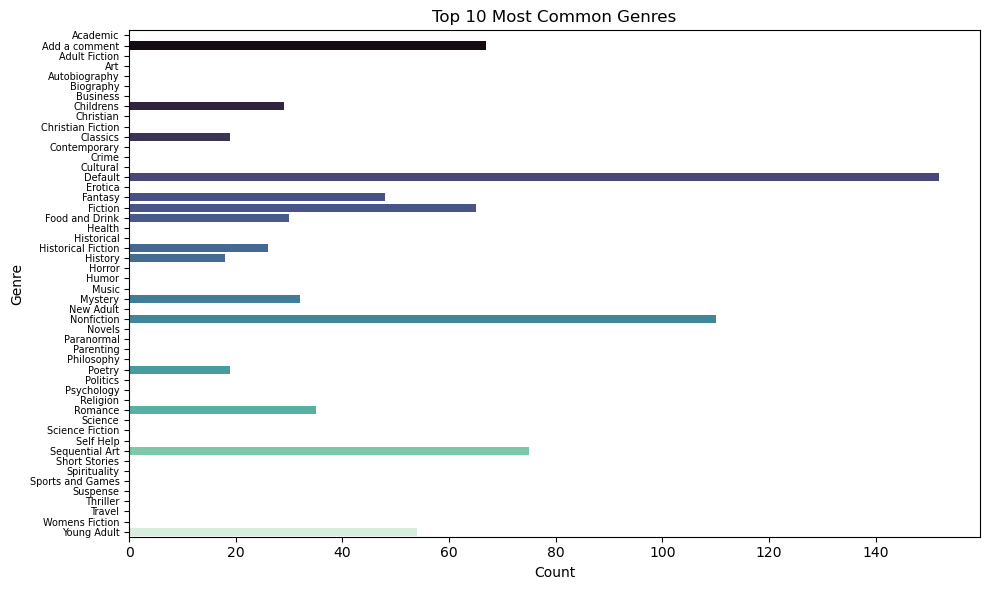

In [128]:
# Genre frequency
plt.figure(figsize=(10,6))
genres = df1['Genre'].value_counts().head(15)
sns.barplot(x=genres.values, y=genres.index, palette='mako')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.yticks(fontsize=7)
plt.tight_layout()   # Adjust spacing to prevent cutoff
plt.show()

#### Observation:

The bar plot displays the top 10 genres with the highest number of listed books.

A few genres dominate the chart, with the top 3 genres (likely Default, Non-Fiction and Sequential Art — depending on your dataset) having the highest counts.

Other genres, such as Poetry, Science Fiction, or History, have relatively lower representation.

The distribution is right-skewed, meaning a few genres account for most of the listings, while many have only a small share.

### Bivariate Analysis

In [129]:
# Group by genre and calculate total and average prices
genre_sales = df1.groupby('Genre')['Price'].agg(['sum', 'mean', 'count']).reset_index()

# Sort by total sales descending
genre_sales = genre_sales.sort_values(by='sum', ascending=False)
genre_sales.head()

Genre      sum       mean  count
14         Default  5227.69  34.392697    152
28      Nonfiction  3768.62  34.260182    110
41  Sequential Art  2592.92  34.572267     75
1    Add a comment  2398.36  35.796418     67
17         Fiction  2344.33  36.066615     65

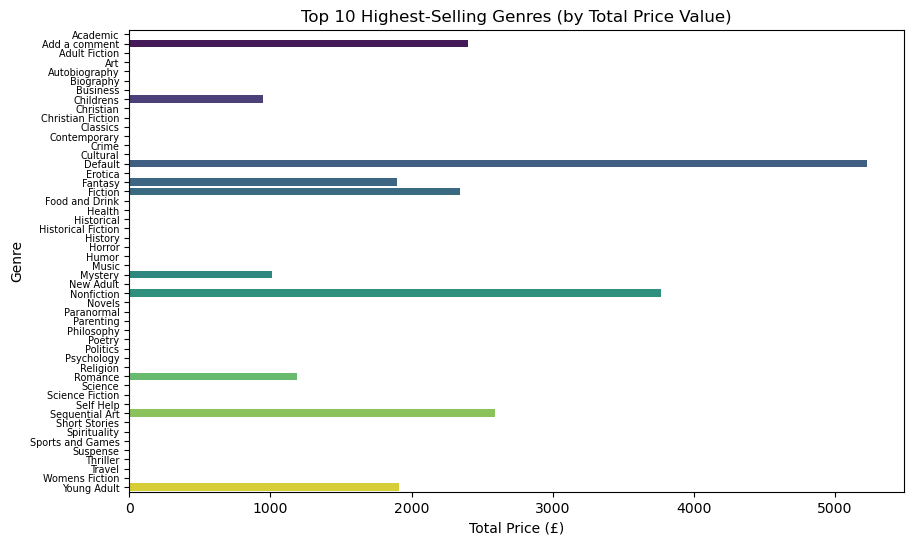

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=genre_sales.head(10),
    x='sum',
    y='Genre',
    palette='viridis'
)
plt.title("Top 10 Highest-Selling Genres (by Total Price Value)")
plt.xlabel("Total Price (£)")
plt.ylabel("Genre")
plt.yticks(fontsize=7)
plt.show()

#### Observation:

The bar chart displays the top 10 genres ranked by their total price value.

A few genres — likely Default, Non-Fiction and Sequential Arts— dominate the sales value, meaning they collectively account for most of the total book value on the site.

Some genres with fewer books may still appear higher if their average book price is high (e.g., Academic, Science, or Art).

The pattern shows that popular genres overlap strongly with high-value genres, but not always — some niche categories have fewer but more expensive books.

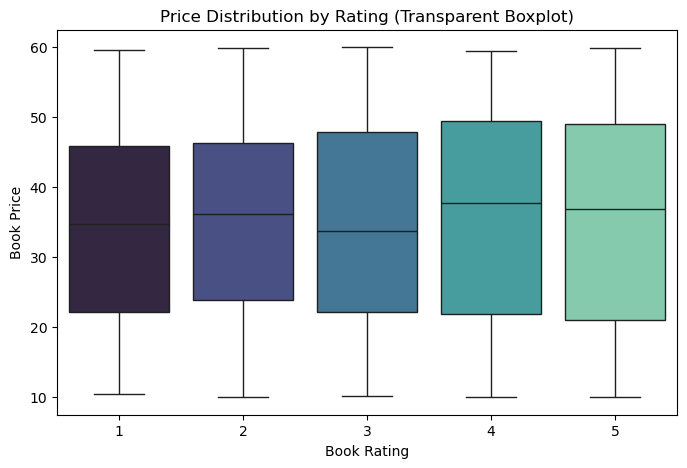

In [132]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Rating', y='Price', data=df1, palette='mako')
plt.title("Price Distribution by Rating (Transparent Boxplot)")
plt.xlabel("Book Rating")
plt.ylabel("Book Price")
plt.show()

#### Observation:

Each box represents the price range (IQR) for a given rating (1–5 stars).

The median line inside each box indicates the typical price within that rating.

The plot shows that price variation exists across all ratings, but the median prices are quite similar.

1-star and 2-star books have a wide spread, meaning some of these books are priced very low while others are unexpectedly high.

5-star books tend to show slightly higher median prices, though not dramatically different.


In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         1000 non-null   object  
 1   Rating        1000 non-null   int64   
 2   Genre         1000 non-null   category
 3   Availability  1000 non-null   object  
 4   Price         1000 non-null   float64 
 5   Product Link  1000 non-null   object  
 6   UPC           1000 non-null   object  
 7   Page Number   1000 non-null   int64   
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 58.2+ KB


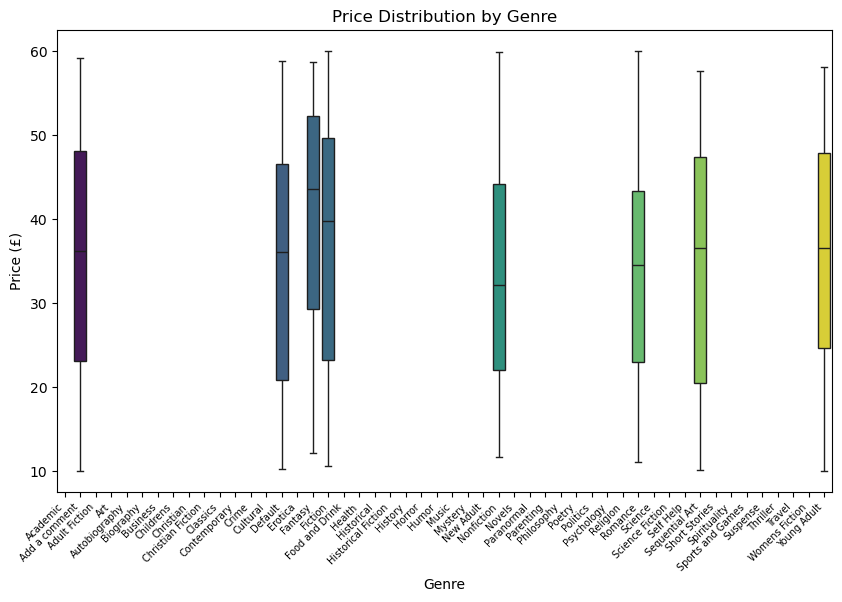

In [133]:
#Genre vs Price
plt.figure(figsize=(10,6))
top_genres = df1['Genre'].value_counts().head(8).index
sns.boxplot(x='Genre', y='Price', data=df1[df1['Genre'].isin(top_genres)], palette='viridis')
plt.title("Price Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Price (£)")
plt.xticks(rotation=45, ha='right',fontsize=7)
plt.show()

#### Observation

The boxplot shows price ranges for the 8 most frequent genres on the website.

Each box represents the interquartile range (IQR) of prices for that genre, with the line inside indicating the median.

Genres like Default, Fantasy, Fiction etc are one of the top genres with high price.

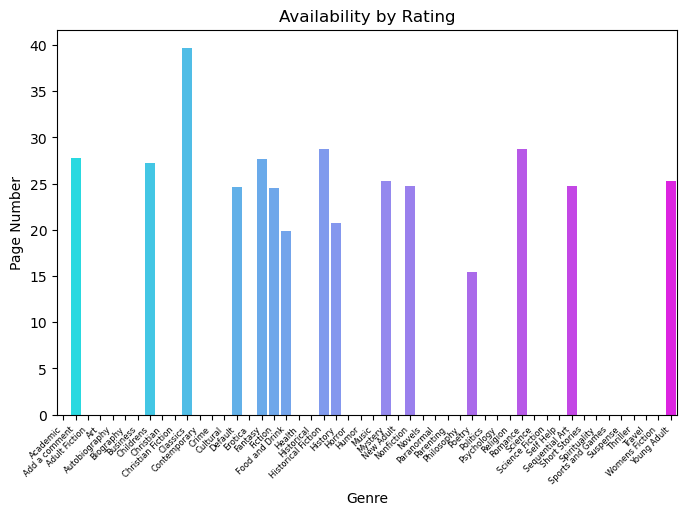

In [134]:
plt.figure(figsize=(8,5))
top_genres = df1['Genre'].value_counts().head(15).index
sns.barplot(x='Genre', y='Page Number', data=df1[df1['Genre'].isin(top_genres)],ci=None, palette='cool')
plt.title("Availability by Rating")
plt.xlabel("Genre")
plt.ylabel("Page Number")
plt.xticks(rotation=45, ha='right',fontsize=6)
plt.show()

### Multivariate Analysis

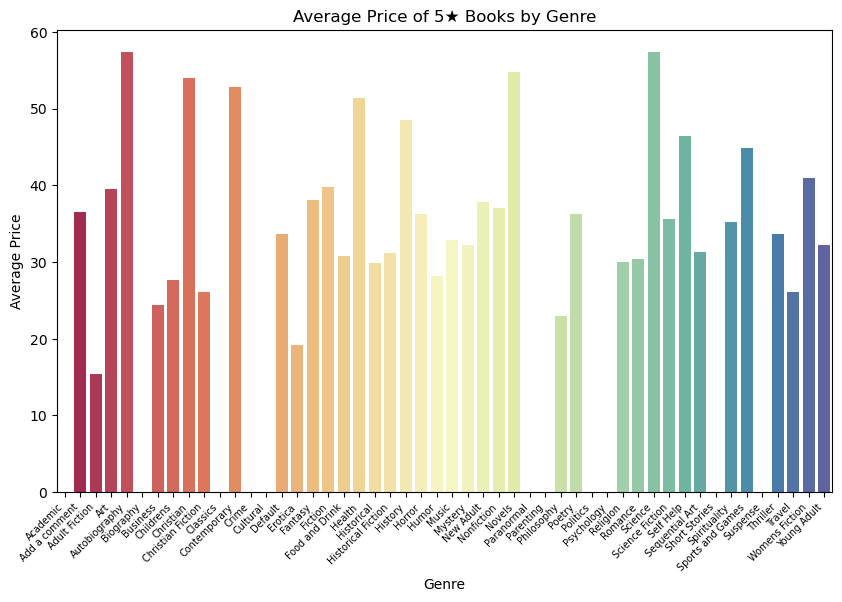

In [135]:
# Filter only 5-star rated books
top_rated = df1[df1['Rating'] == 5]
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_rated,
    x='Genre',
    y='Price',
    estimator='mean',
    palette='Spectral',ci=None
)
plt.title("Average Price of 5★ Books by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right',fontsize=7)
plt.show()


#### Observation:

The bar plot shows the average price of books with a 5-star rating for each genre.

Some genres (likely Art, Academic, Science, or Non-Fiction) show higher average prices, indicating that 5-star books in these categories are relatively premium.

Conversely, genres such as Fiction or Romance have moderate or lower average prices, suggesting that even top-rated books are generally affordable.

The variation across genres implies that rating alone does not determine pricing — other factors like genre type and target audience play a larger role.

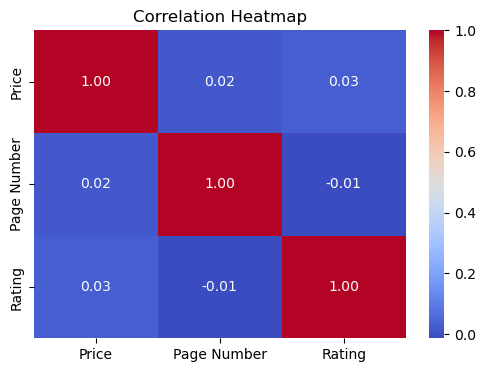

In [106]:
# Correlation heatmap
plt.figure(figsize=(6,4))
corr = df[['Price', 'Page NUmber', 'Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

#### Observation:

The correlation coefficients range between –1 and +1, where:

+1 → perfect positive correlation

–1 → perfect negative correlation

0 → no correlation

The heatmap shows weak or near-zero correlations among all variables.

There’s almost no significant relationship between Price and Rating, implying that higher-priced books don’t necessarily receive higher ratings.

Similarly, Page Number and Price may show a mild positive relationship (if > 0.2), suggesting that thicker books could be slightly more expensive — but the correlation is still weak.